# Imports

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #pip install matplotlib
import seaborn as sns #pip install seaborn
import matplotlib_inline


# Data collection

In [240]:
df1 = pd.read_csv('customer_segmentation_data.csv')
df2 = pd.read_csv('final_raw_sample_0_percent.csv')
df3 = pd.read_csv('insurance_data.csv')
df4=pd.read_csv('1970-2021_DISASTERS.xlsx - emdat data.csv')

In [173]:
df1.head(10)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
5,60937,41,Female,Separated,Master's Degree,Uttar Pradesh,Nurse,87188,policy5,9/19/2020,Chat,policy1,570757,1106,Individual,Text,Text,Afternoon,English,Segment4
6,37676,55,Male,Single,Bachelor's Degree,Rajasthan,Manager,94891,policy3,07-04-2021,Chat,policy2,604069,3661,Group,In-Person Meeting,Text,Weekends,Mandarin,Segment5
7,54100,35,Male,Married,Master's Degree,Himachal Pradesh,Artist,61003,policy1,11-01-2021,Phone,policy3,418997,1148,Business,Email,Phone,Morning,English,Segment5
8,30476,43,Female,Single,Doctorate,Manipur,Salesperson,116249,policy1,9/20/2020,Mobile App,policy4,319423,2612,Business,In-Person Meeting,Text,Weekends,Mandarin,Segment2
9,39071,32,Female,Single,Master's Degree,Gujarat,Artist,49083,policy3,4/24/2020,Phone,policy1,701577,4595,Group,Phone,Email,Weekends,English,Segment2


In [174]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [175]:
df2.head(10)

,Year,Company Name,Country,Industry (Exiobase),Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,Meat Production Capacity,Biodiversity,Abiotic Resources,Water production capacity (Drinking water & Irrigation Water),Wood Production Capacity,% Imputed
0,2018,TELEPERFORMANCE SE,France,Activities auxiliary to financial intermediati...,-1.09%,-10.05%,"(5,52,32,974)","(4,85,90,497)","(11,456)","(6,46,758)","(1,51,520)","(2,061)","(3,661)","(58,28,063)","1,042",2%
1,2018,SGS SA,Switzerland,Activities auxiliary to financial intermediati...,-0.81%,-5.31%,"(5,51,43,250)","(5,07,27,341)","(11,763)","(6,73,791)","(1,57,783)","(2,131)","(3,489)","(35,67,524)",571,0%
2,2018,INTERTEK GROUP PLC,United Kingdom,Activities auxiliary to financial intermediati...,-1.53%,-9.38%,"(5,46,77,862)","(5,34,89,006)","(12,428)","(7,11,263)","(1,66,744)","(2,244)","(3,428)","(2,93,207)",458,1%
3,2018,APPLUS SERVICES SA,Spain,Activities auxiliary to financial intermediati...,-2.26%,-35.02%,"(4,32,98,590)","(1,89,12,678)","(4,652)","(2,49,594)","(58,535)",(811),"(3,850)","(2,40,69,048)",578,2%
4,2018,BUREAU VERITAS SA,France,Activities auxiliary to financial intermediati...,-0.56%,-4.40%,"(3,08,62,191)","(3,01,89,038)","(7,276)","(4,02,067)","(94,143)","(1,298)","(3,953)","(1,65,542)","1,126",3%
5,2018,THOMSON REUTERS CORP,Canada,Activities auxiliary to financial intermediati...,-0.55%,-4.08%,"(3,04,20,679)","(2,49,69,269)","(7,800)","(3,39,439)","(79,427)","(1,281)","(1,94,781)","(48,35,062)","6,380",6%
6,2018,SAGA PLC,United Kingdom,Activities auxiliary to financial intermediati...,-2.59%,-11.19%,"(2,83,71,092)","(2,77,54,833)","(6,407)","(3,69,092)","(86,530)","(1,161)","(1,053)","(1,52,156)",140,1%
7,2018,RELX PLC,United Kingdom,Activities auxiliary to financial intermediati...,-0.26%,-1.02%,"(2,52,05,768)","(2,39,29,648)","(5,996)","(3,17,928)","(74,511)","(1,044)","(9,169)","(8,68,695)","1,224",5%
8,2018,CHINA PACIFIC INSURANCE (GROUP) COMPANY LIMITED,China,Activities auxiliary to financial intermediati...,-0.04%,-0.48%,"(2,22,28,620)","(2,17,14,912)","(4,476)","(2,64,529)","(60,836)",(820),"(74,336)","(1,06,967)","(1,743)",19%
9,2018,RANDSTAD NV,Netherlands,Activities auxiliary to financial intermediati...,-0.08%,-2.03%,"(2,11,21,606)","(2,00,63,296)","(6,617)","(2,61,507)","(60,285)","(1,064)","(30,725)","(7,04,473)","6,361",15%


In [176]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13177 entries, 0 to 13176
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Year                                                           13177 non-null  int64 
 1   Company Name                                                   13177 non-null  object
 2   Country                                                        13177 non-null  object
 3   Industry (Exiobase)                                            13177 non-null  object
 4   Total Environmental Intensity (Revenue)                        13177 non-null  object
 5   Total Environmental Intensity (Operating Income)               12421 non-null  object
 6   Total Environmental Cost                                       13177 non-null  object
 7   Working Capacity                                               1317

In [177]:
df3.head(10)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
5,5,6,NaN,male,34.4,96,Yes,0,No,northwest,1137.47
6,6,7,NaN,male,37.3,86,Yes,0,No,northwest,1141.45
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [178]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [241]:
df4.head(10)

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Argentina,ARG,South America,Americas,Mendoza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,1.0,4.0,1970,1.0,4.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,Australia,AUS,Australia and New Zealand,Oceania,Queensland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,1.0,NaN,1970,1.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Benin,BEN,Western Africa,Africa,Atacora region,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,9.0,NaN,1970,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,"Khulna, Chittagong",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,11.0,12.0,1970,11.0,12.0,300000.0,NaN,3648000.0,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,4.0,13.0,1970,4.0,13.0,17.0,NaN,110.0,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
5,1970-0035-BGD,1970,35,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,7.0,NaN,1970,7.0,NaN,NaN,NaN,10000000.0,NaN,10000000.0,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
6,1970-0058-BGD,1970,58,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,Bangladesh,BGD,Southern Asia,Asia,Bay of Bengal districts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kph,NaN,NaN,NaN,NaN,1970,10.0,23.0,1970,10.0,23.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
7,1970-9005-BRA,1970,9005,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Brazil,BRA,South America,Americas,Northeast,NaN,NaN,NaN,Yes,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,8.0,NaN,1970,NaN,NaN,NaN,NaN,10000000.0,NaN,10000000.0,NaN,NaN,100.0,15.001282,NaN,NaN,NaN,NaN
8,1970-0037-BRA,1970,37,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Brazil,BRA,South America,Americas,"Recife, South Pernambuco",NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,7.0,21.0,1970,7.0,21.0,172.0,NaN,104371.0,NaN,104371.0,NaN,NaN,46000.0,15.001282,NaN,NaN,NaN,NaN
9,1970-0054-BRB,1970,54,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Barbados,BRB,Caribbean,Americas,Entire Isl.,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1970,10.0,2.0,1970,10.0,2.0,3.0,10.0,200.0,NaN,210.0,NaN,NaN,500.0,15.001282,NaN,NaN,NaN,NaN


In [242]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  object 
 12  Region            

# Data Preparation and Cleaning 

## DF1 customer_segmentation_data.csv

In [181]:
df1.shape

(53503, 20)

In [182]:
print(df1.isnull().sum())

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64


In [183]:
# Find duplicates
num_duplicates = df1.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [184]:
#Find anomalies
def detect_anomalies(df, columns):
    anomalies = {}
    for col in columns:
        # Compute the first (Q1) and third (Q3) quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        anomalies[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return anomalies

numeric_columns = df1.select_dtypes(include=[np.number]).columns.tolist()
anomalies = detect_anomalies(df1, numeric_columns)

for col, anomaly_series in anomalies.items():
    print(f"{col}: {len(anomaly_series)} anomalies found")


Customer ID: 0 anomalies found
Age: 0 anomalies found
Income Level: 0 anomalies found
Coverage Amount: 0 anomalies found
Premium Amount: 0 anomalies found


In [185]:
# Convert 'Purchase History' date column in df1 to datetime format
df1['Purchase History'] = pd.to_datetime(df1['Purchase History'], errors='coerce')

In [186]:
# Create an Income Segmentation in df1
df1['Income Segment'] = pd.cut(df1['Income Level'], bins=[0, 30000, 60000, 100000, np.inf], 
    labels=['Low', 'Middle', 'High', 'Very High'])

#Create "Age Group" variable using defined age bins
bins = [0, 25, 35, 45, 55, np.inf]
labels = ['<25', '25-34', '35-44', '45-54', '55+']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)



In [187]:
df1.describe()

,Customer ID,Age,Income Level,Purchase History,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,22695,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,2020-12-15 04:50:01.824190464,492580.789638,3023.702447
min,1.000000,18.000000,20001.000000,2018-01-01 00:00:00,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,2019-06-12 00:00:00,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,2020-12-07 00:00:00,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,2022-06-10 00:00:00,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,2023-12-12 00:00:00,1000000.000000,5000.000000
std,28165.000067,15.079486,36651.075670,NaN,268405.505571,1285.834295


## DF2 final_raw_sample_0_percent.csv

In [188]:
df2.shape

(13177, 16)

In [189]:
print(df2.isnull().sum())

Year                                                               0
Company Name                                                       0
Country                                                            0
Industry (Exiobase)                                                0
Total Environmental Intensity (Revenue)                            0
Total Environmental Intensity (Operating Income)                 756
Total Environmental Cost                                           0
Working Capacity                                                   0
Fish Production Capacity                                           0
Crop Production Capacity                                           0
Meat Production Capacity                                           0
Biodiversity                                                       0
Abiotic Resources                                                  0
Water production capacity (Drinking water & Irrigation Water)      0
Wood Production Capacity          

In [190]:
# Filter all the Insurance Company in the Dataframe
df2 = df2[df2['Company Name'].str.contains('Insurance ', case=False, na=False)]

In [191]:
# Function to clean and convert numeric columns in df2
def clean_numeric_column(series):
    return (series.astype(str)
            .str.replace('[^0-9.-]', '', regex=True)  # Remove non-numeric characters
            .replace('', np.nan)  # Replace empty strings with NaN
            .astype(float))  # Convert to float

# Apply cleaning function to specific columns in df2
df2['Total Environmental Intensity (Revenue)'] = clean_numeric_column(df2['Total Environmental Intensity (Revenue)'])
df2['Total Environmental Intensity (Operating Income)'] = clean_numeric_column(df2['Total Environmental Intensity (Operating Income)'])


In [192]:
# Create Environmental Impact Score in df2
df2['Environmental Impact Score'] = (
    df2['Total Environmental Intensity (Revenue)'].abs() + 
    df2['Total Environmental Intensity (Operating Income)'].abs()
) / 2

In [193]:
df2.describe()

,Year,Total Environmental Intensity (Revenue),Total Environmental Intensity (Operating Income),Environmental Impact Score
count,43.000000,43.000000,40.000000,40.000000
mean,2014.627907,-0.113488,-2.004250,1.148625
std,2.449716,0.258087,5.931314,3.065115
min,2010.000000,-1.710000,-37.560000,0.145000
25%,2013.000000,-0.140000,-1.295000,0.305000
50%,2015.000000,-0.070000,-0.750000,0.467500
75%,2017.000000,-0.035000,-0.495000,0.812500
max,2018.000000,0.100000,1.750000,19.635000


## DF3 insurance_data.csv

In [194]:
df3.shape

(1340, 11)

In [195]:
print(df3.isnull().sum())

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64


In [196]:
#drop lines where missing values
df3 = df3.dropna()

In [197]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1332 non-null   int64  
 1   PatientID      1332 non-null   int64  
 2   age            1332 non-null   float64
 3   gender         1332 non-null   object 
 4   bmi            1332 non-null   float64
 5   bloodpressure  1332 non-null   int64  
 6   diabetic       1332 non-null   object 
 7   children       1332 non-null   int64  
 8   smoker         1332 non-null   object 
 9   region         1332 non-null   object 
 10  claim          1332 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 124.9+ KB


In [198]:
# Create a risk category based on 'claim' amounts.
# Segment into three categories: Low, Medium, and High.
claim_quantiles = df3['claim'].quantile([0.33, 0.66]).values

def risk_category(claim):
    if claim <= claim_quantiles[0]:
        return 'Low'
    elif claim <= claim_quantiles[1]:
        return 'Medium'
    else:
        return 'High'

df3['risk_category'] = df3['claim'].apply(risk_category)

In [199]:
# Create a BMI segmentation variable based on quantiles.
bmi_quantiles = df3['bmi'].quantile([0.33, 0.66]).values

def bmi_segment(bmi):
    if bmi <= bmi_quantiles[0]:
        return 'Low'
    elif bmi <= bmi_quantiles[1]:
        return 'Medium'
    else:
        return 'High'

df3['bmi_segment'] = df3['bmi'].apply(bmi_segment)

In [200]:
# Create a Risk Score in df3 based on insurance claims
df3['Risk Score'] = df3['claim'] / (df3['age'] + 1)

In [201]:
df3.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim,Risk Score
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,673.474474,674.474474,38.086336,30.658333,94.189189,1.099850,13325.246426,375.977298
std,384.703785,384.703785,11.112804,6.118967,11.445173,1.205958,12109.620712,384.738613
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000,25.265000
25%,340.750000,341.750000,29.000000,26.200000,86.000000,0.000000,4760.157500,123.140865
50%,673.500000,674.500000,38.000000,30.350000,92.000000,1.000000,9412.965000,243.191324
75%,1006.250000,1007.250000,47.000000,34.725000,99.000000,2.000000,16781.327500,454.142917
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000,2577.381579


## DF4 1970-2021_DISASTERS.csv

In [243]:
df4.shape

(14644, 47)

In [244]:
print(df4.isnull().sum())

Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                      10075
Dis Mag Scale                       1073
Latitude        

In [245]:
# Columns kept
columns_to_keep = [
    'Dis No',
    'Year',
    'Country',
    'ISO',
    'Continent',
    'Disaster Type',
    'Total Deaths',
    "Total Damages ('000 US$)",
    'Total Affected',
]

df4 = df4[columns_to_keep]

# Severity score using Total Deaths, Total Damages and Total Affected
df4['severity_score'] = (
    df4['Total Deaths'].fillna(0) + 
    (df4["Total Damages ('000 US$)"].fillna(0) * 0.001) + 
    df4['Total Affected'].fillna(0)
)

# Segments (Low, Medium, High impact) based on the composite severity score
df4['impact_segment'] = pd.cut(
    df4['severity_score'], 
    bins=[0, 50, 200, df4['severity_score'].max()], 
    labels=['Low', 'Medium', 'High']
)

In [246]:
df4.describe()

,Year,Total Deaths,Total Damages ('000 US$),Total Affected,severity_score
count,14644.000000,10199.000000,4.863000e+03,1.104100e+04,1.464400e+04
mean,2001.596422,361.813119,7.746866e+05,7.277392e+05,5.491960e+05
std,12.538572,6495.045853,4.901266e+06,7.851210e+06,6.824902e+06
min,1970.000000,1.000000,2.000000e+00,1.000000e+00,0.000000e+00
25%,1993.000000,5.000000,1.000000e+04,6.320000e+02,1.100000e+02
50%,2003.000000,16.000000,7.100000e+04,5.736000e+03,1.784000e+03
75%,2012.000000,50.000000,3.500000e+05,5.600000e+04,2.500200e+04
max,2021.000000,300000.000000,2.100000e+08,3.300000e+08,3.300030e+08


# Data Analysis and Specifications

## DF1 customer_segmentation_data.csv

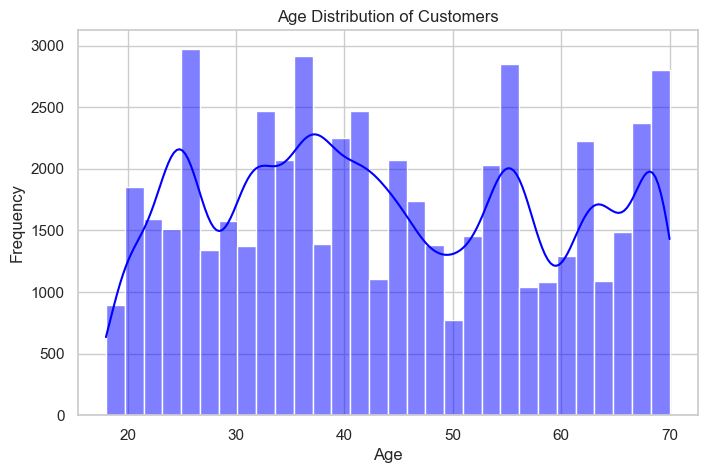

In [209]:
plt.figure(figsize=(8, 5))
sns.histplot(df1['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

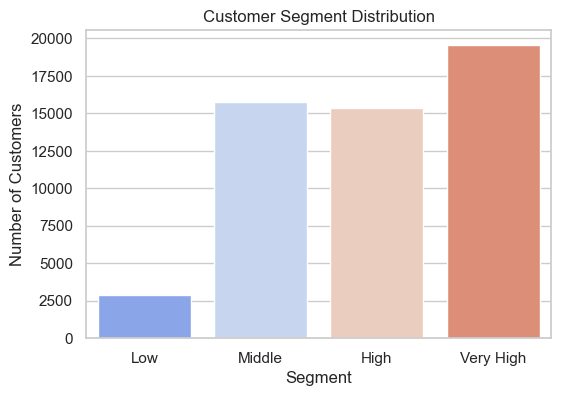

In [210]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Income Segment', hue='Income Segment', data=df1, palette='coolwarm', legend=False)
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()

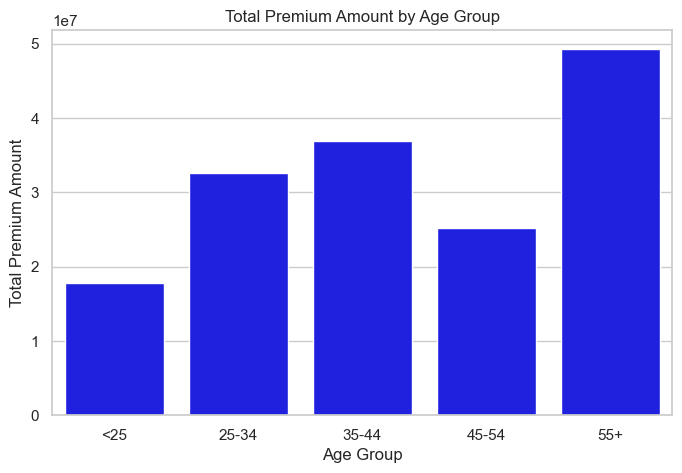

In [211]:
# Group by age category and sum the Premium Amount
age_premium = df1.groupby('Age Group', observed=True)['Premium Amount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data=age_premium, x='Age Group', y='Premium Amount', color='blue')

# Labels and title
plt.title('Total Premium Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Premium Amount')
plt.show()


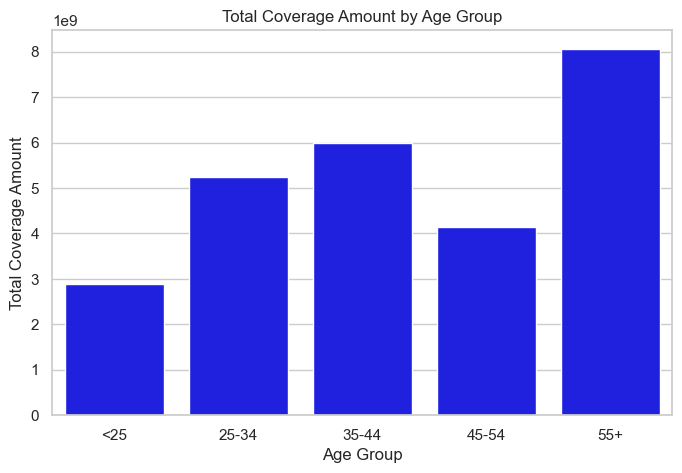

In [212]:
# Group by age category and sum the Coverage Amount
age_coverage = df1.groupby('Age Group', observed=True)['Coverage Amount'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data=age_coverage, x='Age Group', y='Coverage Amount', color='blue')

# Labels and title
plt.title('Total Coverage Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Coverage Amount')
plt.show()

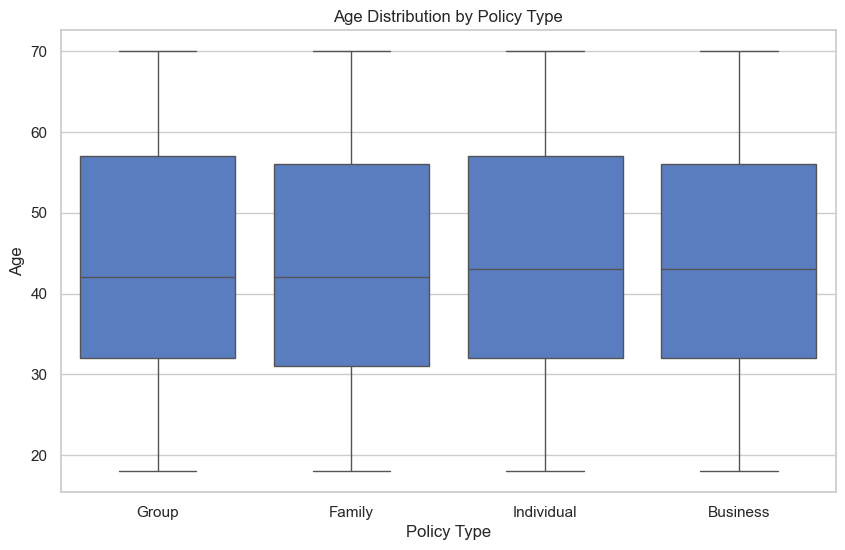

In [213]:
# Boxplot of Age by Policy Type to uncover potential trends in policy selection
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x='Policy Type', y='Age')
plt.title("Age Distribution by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Age")
plt.show()

Summary statistics for Income Level by Education Level:
       Education Level          mean   median           std  count
0     Associate Degree  83001.642758  81504.0  36613.975100  12213
1    Bachelor's Degree  82384.537552  78002.5  37209.233382   9214
2            Doctorate  82084.350161  78287.0  36867.744048  12103
3  High School Diploma  83504.584520  83040.0  36103.005381  10607
4      Master's Degree  82891.676917  81707.5  36468.986543   9366


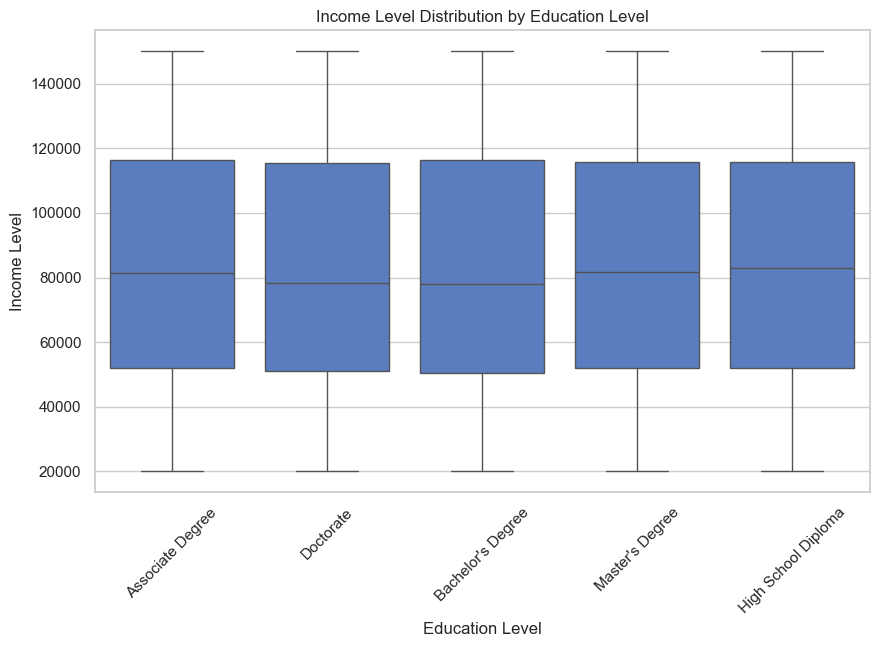

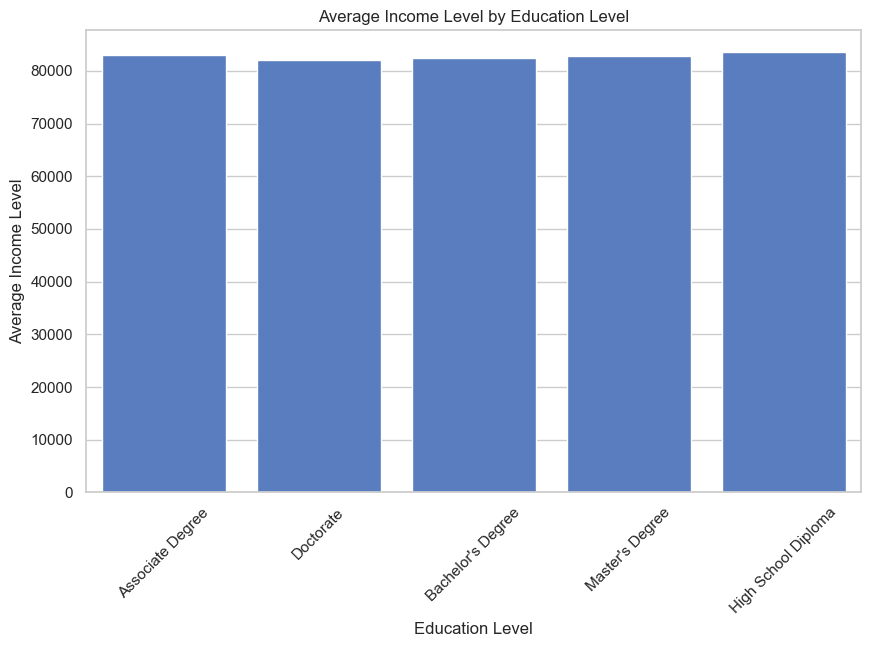

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

#Group by Education Level and compute summary statistics for Income Level
education_income_stats = df1.groupby('Education Level')['Income Level'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Summary statistics for Income Level by Education Level:")
print(education_income_stats)

# Boxplot: Distribution of Income Level across Education Levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Education Level', y='Income Level')
plt.title("Income Level Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income Level")
plt.xticks(rotation=45)
plt.show()

# Bar Plot: Average Income Level by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Education Level', y='Income Level', estimator=np.mean, errorbar=None)
plt.title("Average Income Level by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Income Level")
plt.xticks(rotation=45)
plt.show()


Summary statistics for Income Level by Gender:
   Gender          mean   median           std  count
0  Female  82396.768728  80031.0  36450.282183  26004
1    Male  83119.680061  81257.0  36837.161188  27499


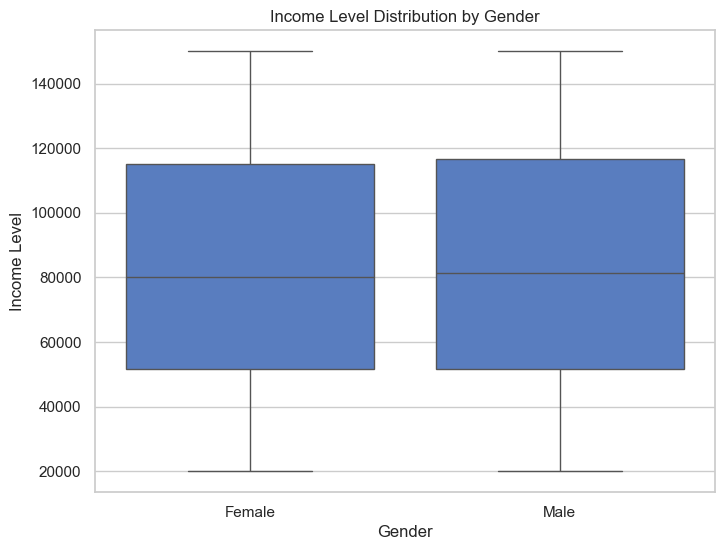

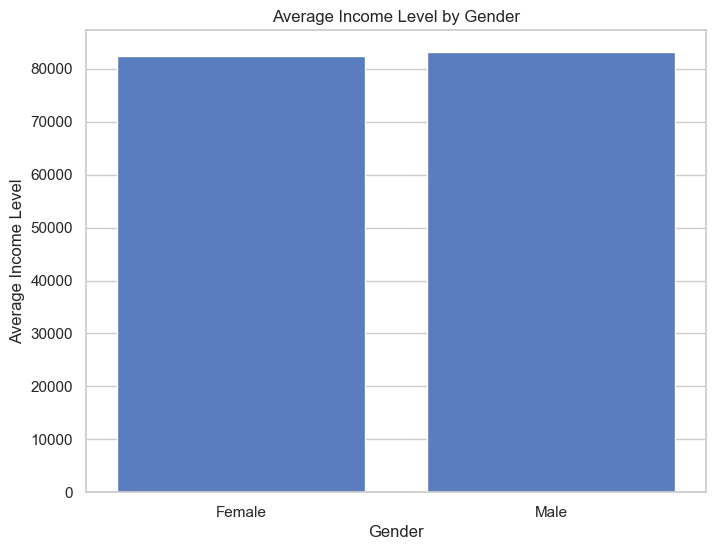

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Group data by Gender and compute summary statistics for Income Level
gender_income_stats = df1.groupby('Gender')['Income Level'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Summary statistics for Income Level by Gender:")
print(gender_income_stats)

# Boxplot: Distribution of Income Level by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Gender', y='Income Level')
plt.title("Income Level Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Income Level")
plt.show()

# Bar Plot: Average Income Level by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='Gender', y='Income Level', estimator=np.mean, errorbar=None)
plt.title("Average Income Level by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Income Level")
plt.show()


Summary statistics for Premium Amount by Gender:
   Gender         mean  median          std  count
0  Female  3063.456391  3294.0  1292.199522  26004
1    Male  2986.109749  3130.0  1278.672974  27499


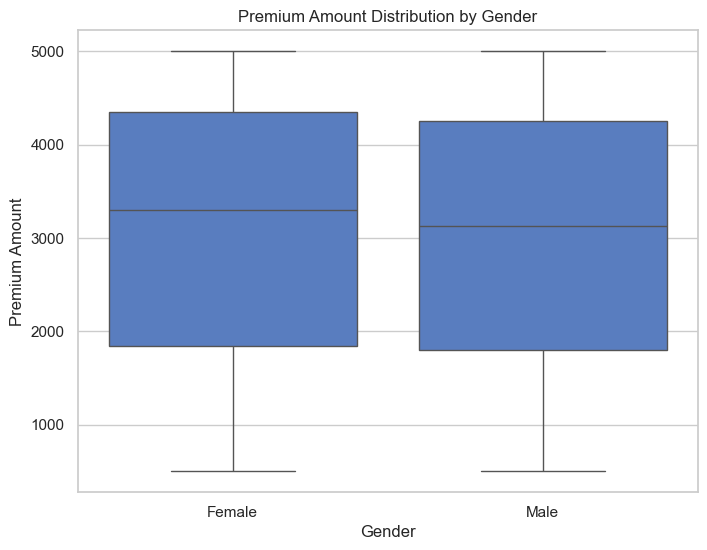

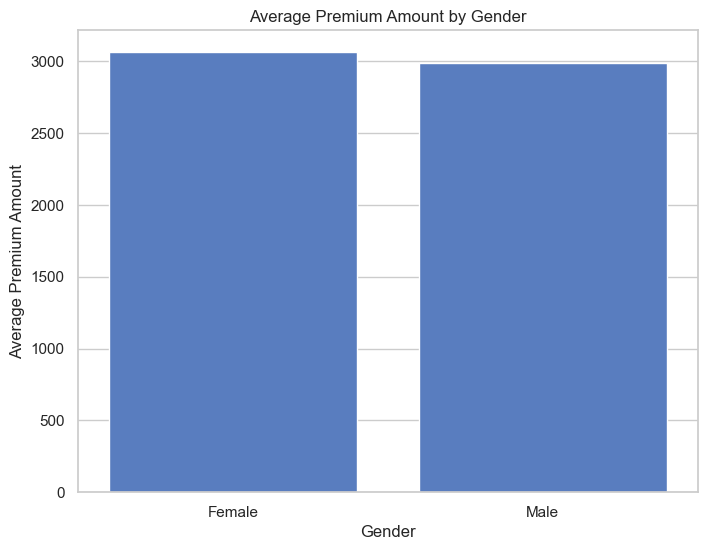

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Group data by Gender and compute summary statistics for Premium Amount
gender_premium_stats = df1.groupby('Gender')['Premium Amount'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Summary statistics for Premium Amount by Gender:")
print(gender_premium_stats)

# Boxplot: Distribution of Premium Amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Gender', y='Premium Amount')
plt.title("Premium Amount Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Premium Amount")
plt.show()

# Bar Plot: Average Premium Amount by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='Gender', y='Premium Amount', estimator=np.mean, errorbar=None)
plt.title("Average Premium Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Premium Amount")
plt.show()


Summary statistics for Coverage Amount by Gender:
   Gender           mean    median            std  count
0  Female  491964.821950  478855.5  267560.590463  26004
1    Male  493163.269864  475965.0  269205.614577  27499


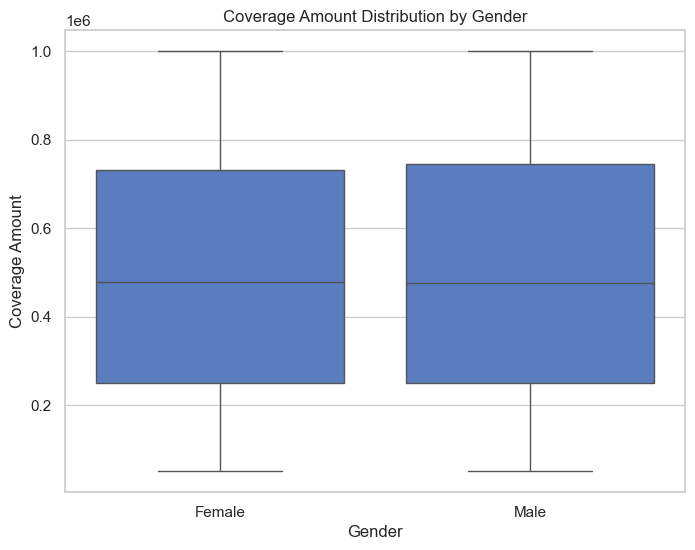

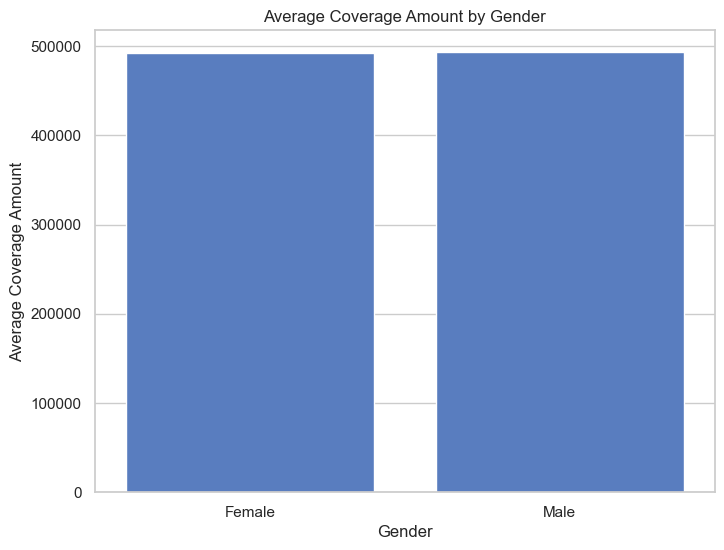

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Group by Gender and compute summary statistics for Coverage Amount
gender_coverage_stats = df1.groupby('Gender')['Coverage Amount'].agg(['mean', 'median', 'std', 'count']).reset_index()
print("Summary statistics for Coverage Amount by Gender:")
print(gender_coverage_stats)

# Distribution of Coverage Amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Gender', y='Coverage Amount')
plt.title("Coverage Amount Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Coverage Amount")
plt.show()

# Average Coverage Amount by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='Gender', y='Coverage Amount', estimator=np.mean, errorbar=None)
plt.title("Average Coverage Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Coverage Amount")
plt.show()


## DF2 final_raw_sample_0_percent.csv

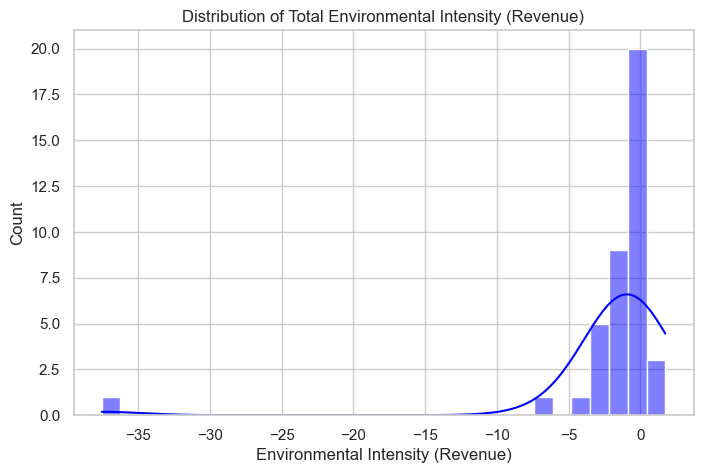

In [218]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['Total Environmental Intensity (Operating Income)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Environmental Intensity (Revenue)')
plt.xlabel('Environmental Intensity (Revenue)')
plt.ylabel('Count')
plt.show()

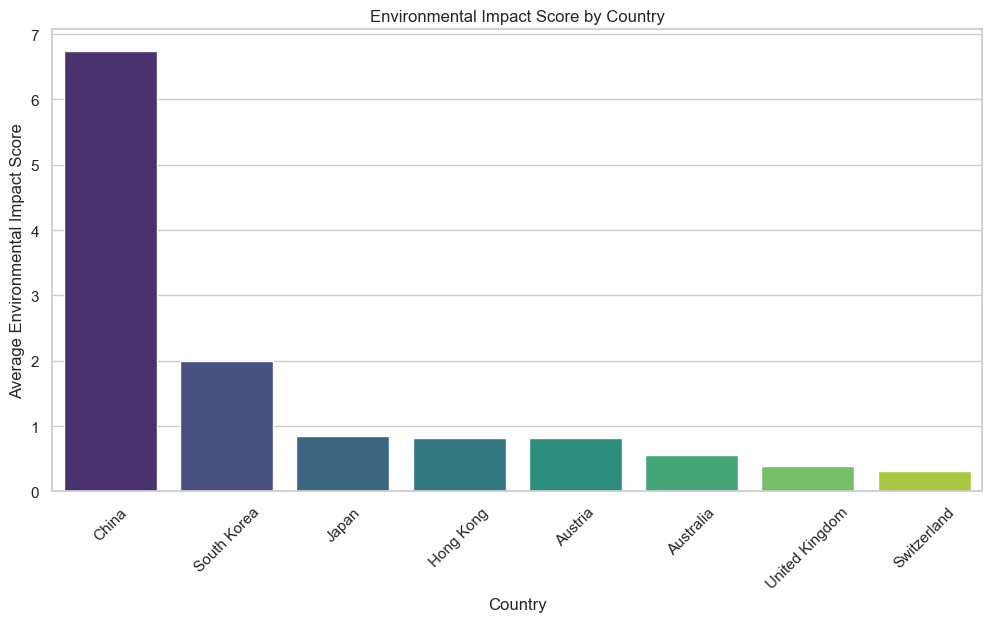

In [219]:
# Group by Country and calculate the average Environmental Impact Score
country_impact = df2.groupby('Country', observed=True)['Environmental Impact Score'].mean().reset_index()

# Sort by Environmental Impact Score for better visualization
country_impact = country_impact.sort_values(by='Environmental Impact Score', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=country_impact, x='Country', y='Environmental Impact Score', hue='Country', 
            palette='viridis', dodge=False, legend=False)

# Labels and title
plt.title('Environmental Impact Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Environmental Impact Score')
plt.xticks(rotation=45) 
plt.show()

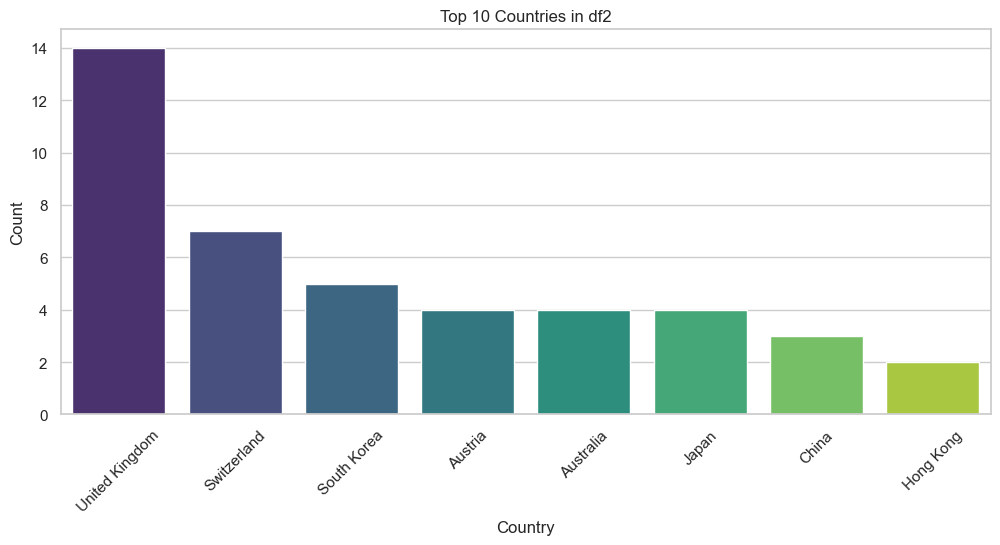

In [220]:
plt.figure(figsize=(12, 5))
top_countries = df2['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, hue=top_countries.index, 
            dodge=False, palette='viridis', legend=False)
plt.title('Top 10 Countries in df2')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


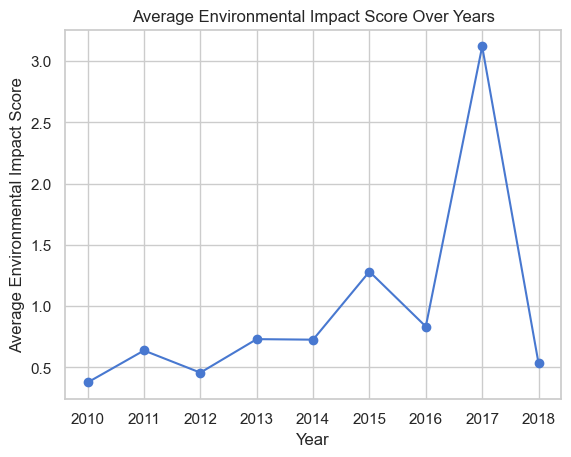

In [221]:
# 3. Time Series Analysis: Average Environmental Impact Score per Year
avg_impact_per_year = df2.groupby('Year')['Environmental Impact Score'].mean().reset_index()
plt.figure()
plt.plot(avg_impact_per_year['Year'], avg_impact_per_year['Environmental Impact Score'], marker='o')
plt.title('Average Environmental Impact Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Environmental Impact Score')
plt.show()

## DF3 insurance_data.csv

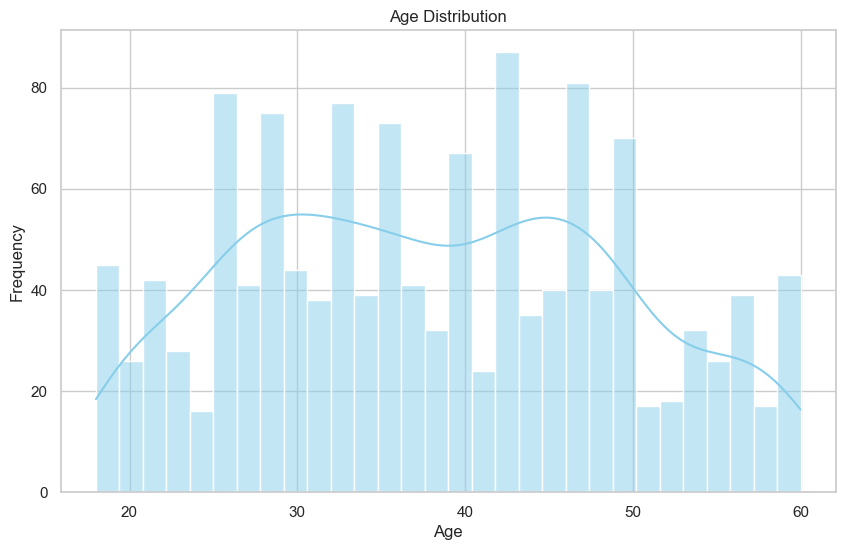

In [222]:
plt.figure(figsize=(10, 6))
sns.histplot(df3['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

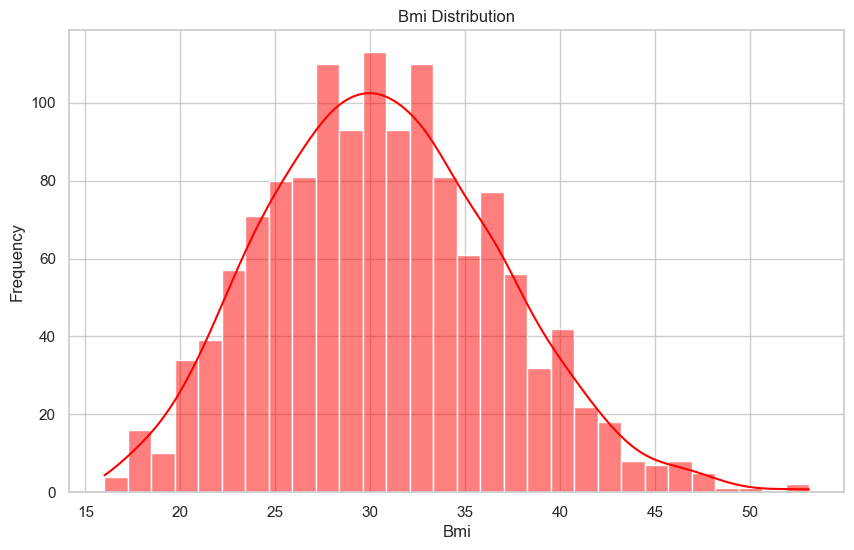

In [223]:
plt.figure(figsize=(10, 6))
sns.histplot(df3['bmi'], kde=True, bins=30, color='red')
plt.title('Bmi Distribution')
plt.xlabel('Bmi')
plt.ylabel('Frequency')
plt.show()

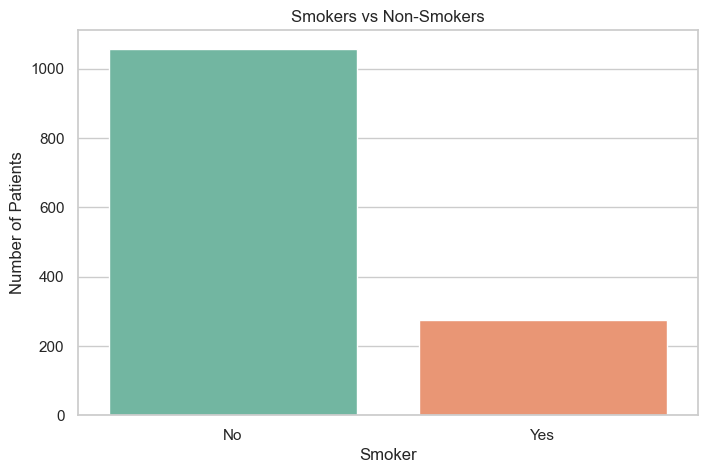

In [224]:
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=df3, hue='smoker', palette='Set2', dodge=False)
plt.title('Smokers vs Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Number of Patients')
plt.legend([], [], frameon=False)  
plt.show()


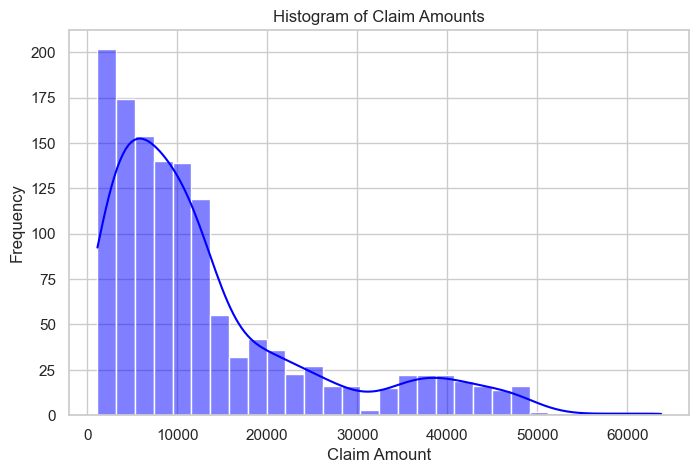

In [225]:
plt.figure(figsize=(8, 5))
sns.histplot(df3['claim'], bins=30, kde=True, color='blue')
plt.title('Histogram of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Claim vs Age')

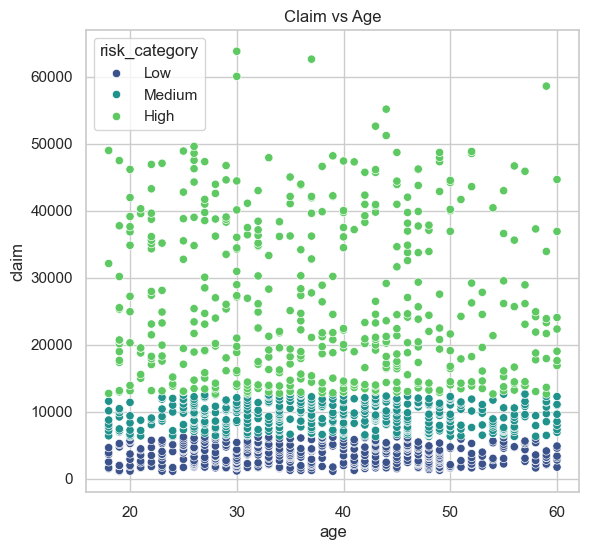

In [226]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='claim', data=df3, hue='risk_category', palette='viridis')
plt.title("Claim vs Age")

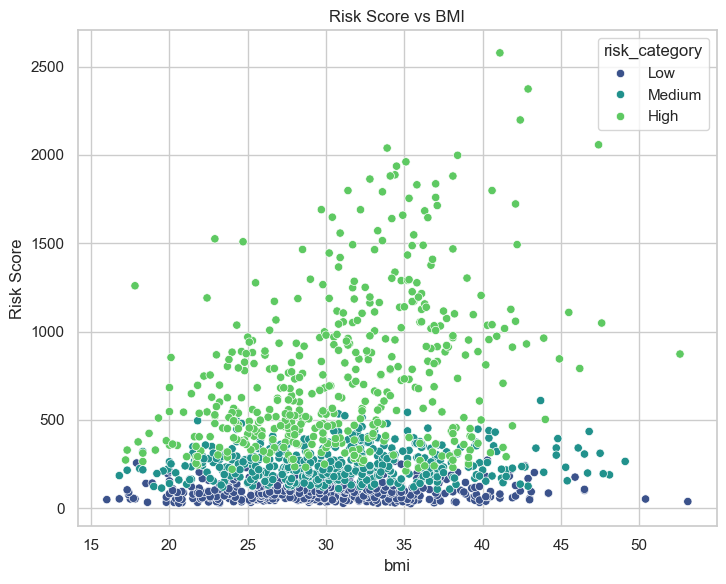

In [227]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='Risk Score', data=df3, hue='risk_category', palette='viridis')
plt.title("Risk Score vs BMI")
plt.tight_layout()
plt.show()

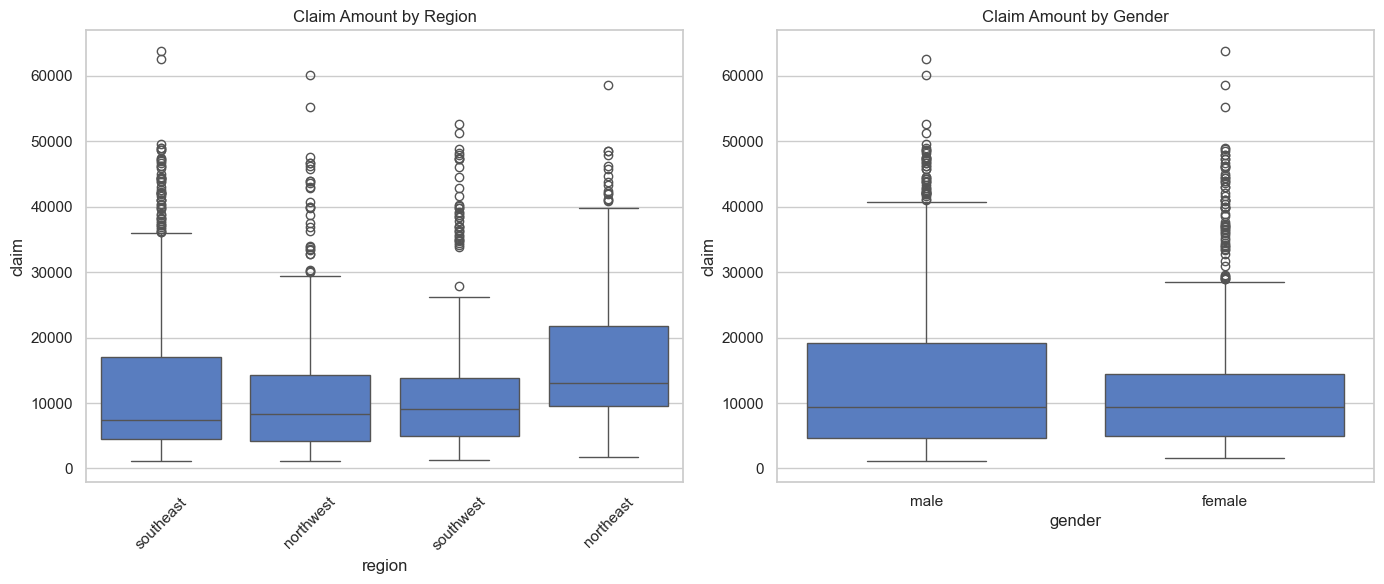

In [228]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='region', y='claim', data=df3)
plt.title("Claim Amount by Region")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(x='gender', y='claim', data=df3)
plt.title("Claim Amount by Gender")
plt.tight_layout()
plt.show()

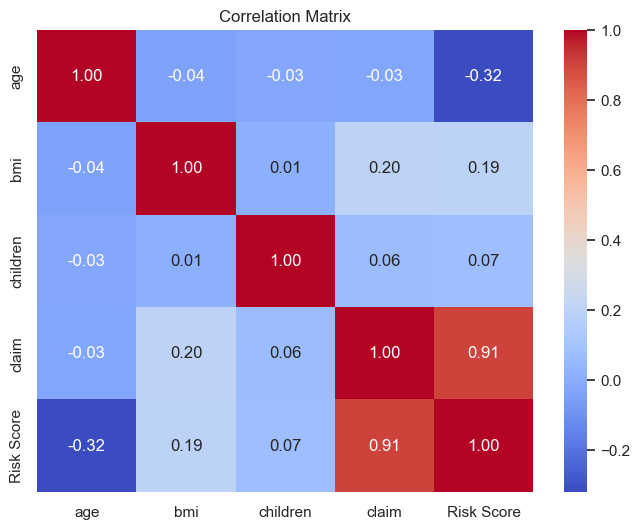

In [229]:
numeric_cols = ['age', 'bmi', 'children', 'claim', 'Risk Score']
corr_matrix = df3[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

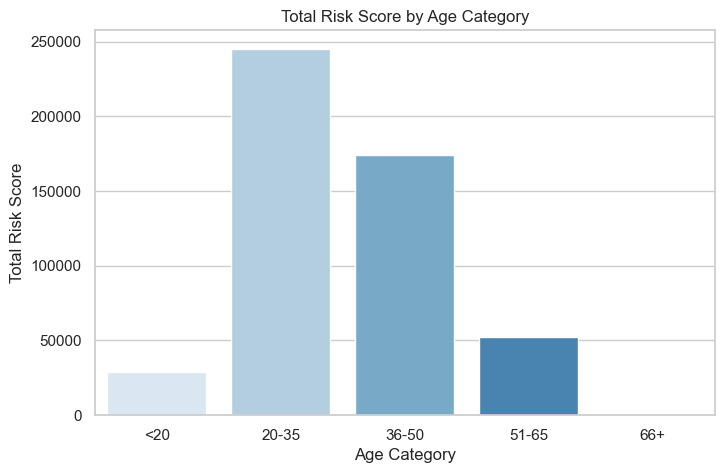

In [230]:
# Define age bins
bins = [0, 20, 35, 50, 65, 100]  # Age ranges
labels = ['<20', '20-35', '36-50', '51-65', '66+']

# Create age category column
df3['Age Category'] = pd.cut(df3['age'], bins=bins, labels=labels, right=False)

# Group by age category and sum Risk Score with observed=True to avoid warnings
age_risk = df3.groupby('Age Category', observed=True)['Risk Score'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(data=age_risk, x='Age Category', y='Risk Score', hue='Age Category',
            dodge=False, palette='Blues', legend=False)

# Labels and title
plt.title('Total Risk Score by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Total Risk Score')
plt.show()


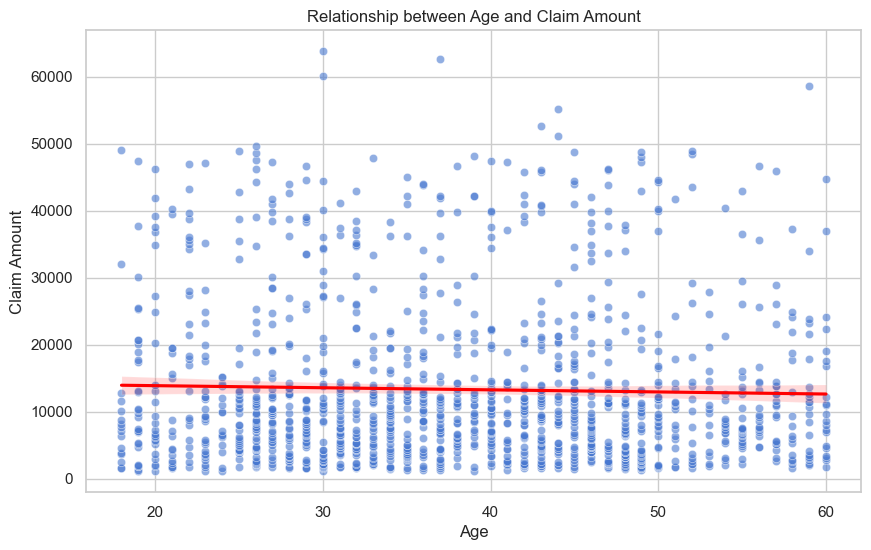

Correlation between Age and Claim Amount: -0.028636389912437738


In [231]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='claim', data=df3, alpha=0.6)
sns.regplot(x='age', y='claim', data=df3, scatter=False, color='red')
plt.title('Relationship between Age and Claim Amount')
plt.xlabel('Age')
plt.ylabel('Claim Amount')
plt.show()

# Calculate the correlation coefficient between age and claim amount
correlation = df3['age'].corr(df3['claim'])
print("Correlation between Age and Claim Amount:", correlation)


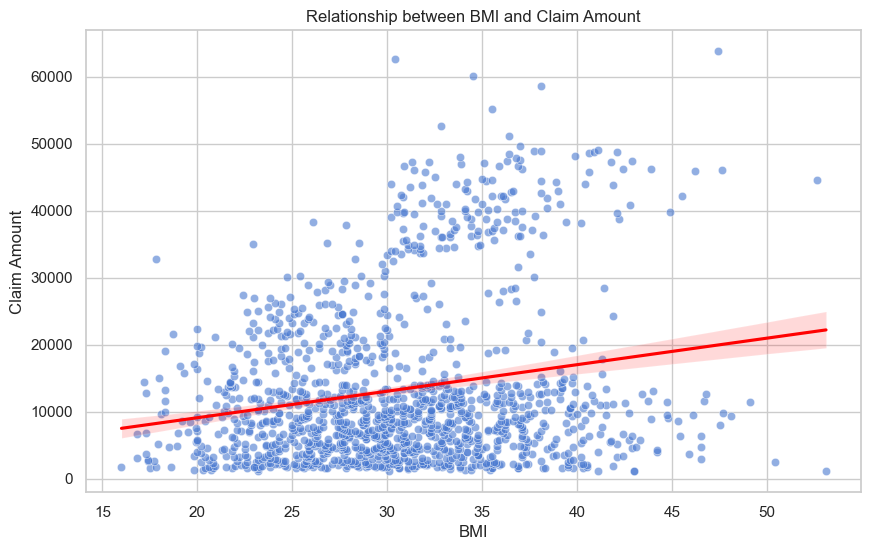

Correlation between BMI and Claim Amount: 0.19994510599944257


In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', data=df3, alpha=0.6)
sns.regplot(x='bmi', y='claim', data=df3, scatter=False, color='red')
plt.title('Relationship between BMI and Claim Amount')
plt.xlabel('BMI')
plt.ylabel('Claim Amount')
plt.show()

# Calculate the Pearson correlation coefficient between BMI and claim amount
correlation = df3['bmi'].corr(df3['claim'])
print("Correlation between BMI and Claim Amount:", correlation)


## DF4 1970-2021_DISASTERS.csv

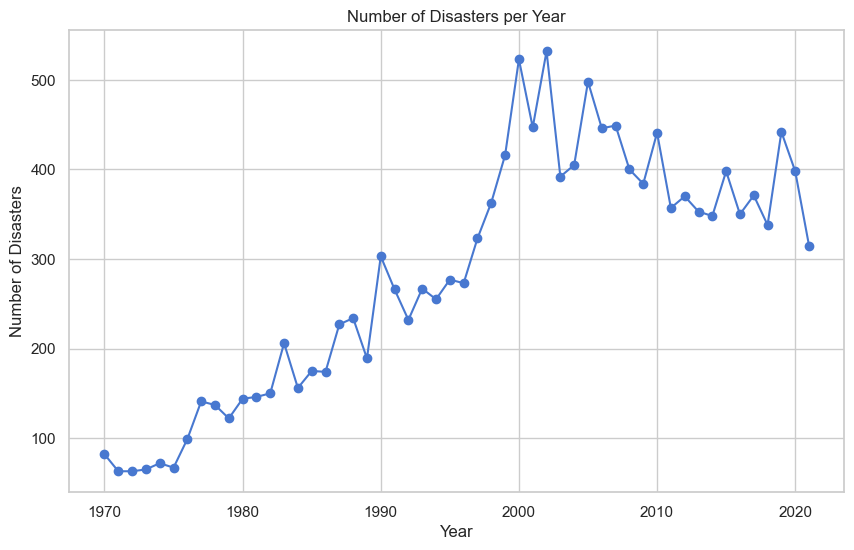

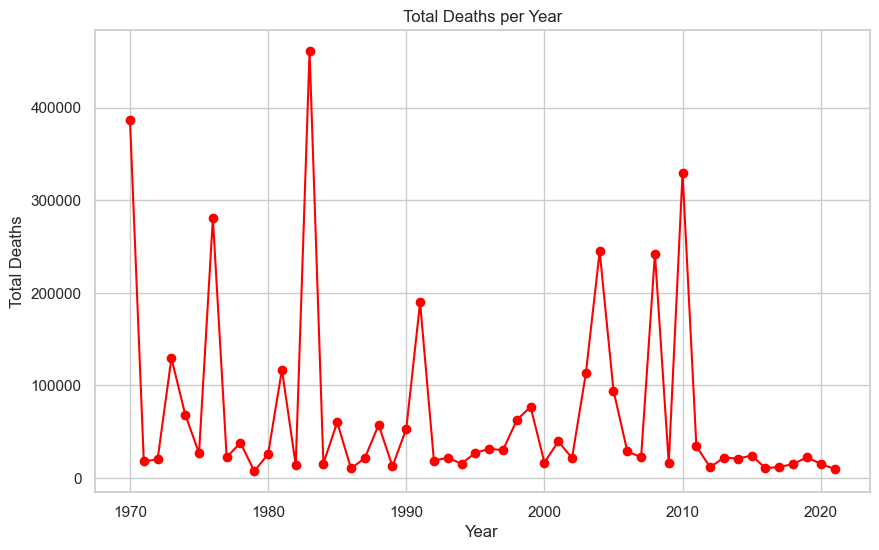

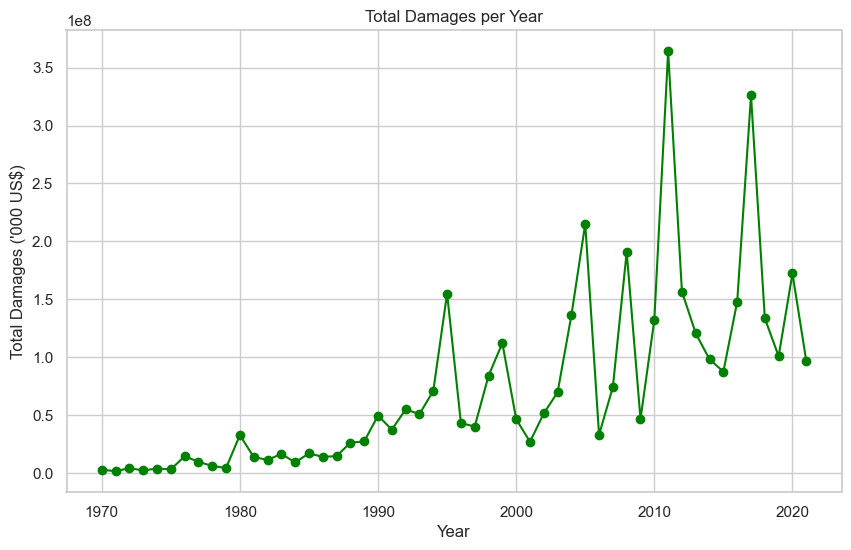

In [247]:
# Group by Year and aggregate key metrics
yearly_stats = df4.groupby("Year").agg(
    num_disasters=("Dis No", "count"),
    total_deaths=("Total Deaths", "sum"),
    total_damages=("Total Damages ('000 US$)", "sum"),
).reset_index()

# Number of Disasters per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["num_disasters"], marker="o")
plt.title("Number of Disasters per Year")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.grid(True)
plt.show()

# Total Deaths per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["total_deaths"], marker="o", color='red')
plt.title("Total Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()

# Total Damages per Year
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats["Year"], yearly_stats["total_damages"], marker="o", color='green')
plt.title("Total Damages per Year")
plt.xlabel("Year")
plt.ylabel("Total Damages ('000 US$)")
plt.grid(True)
plt.show()



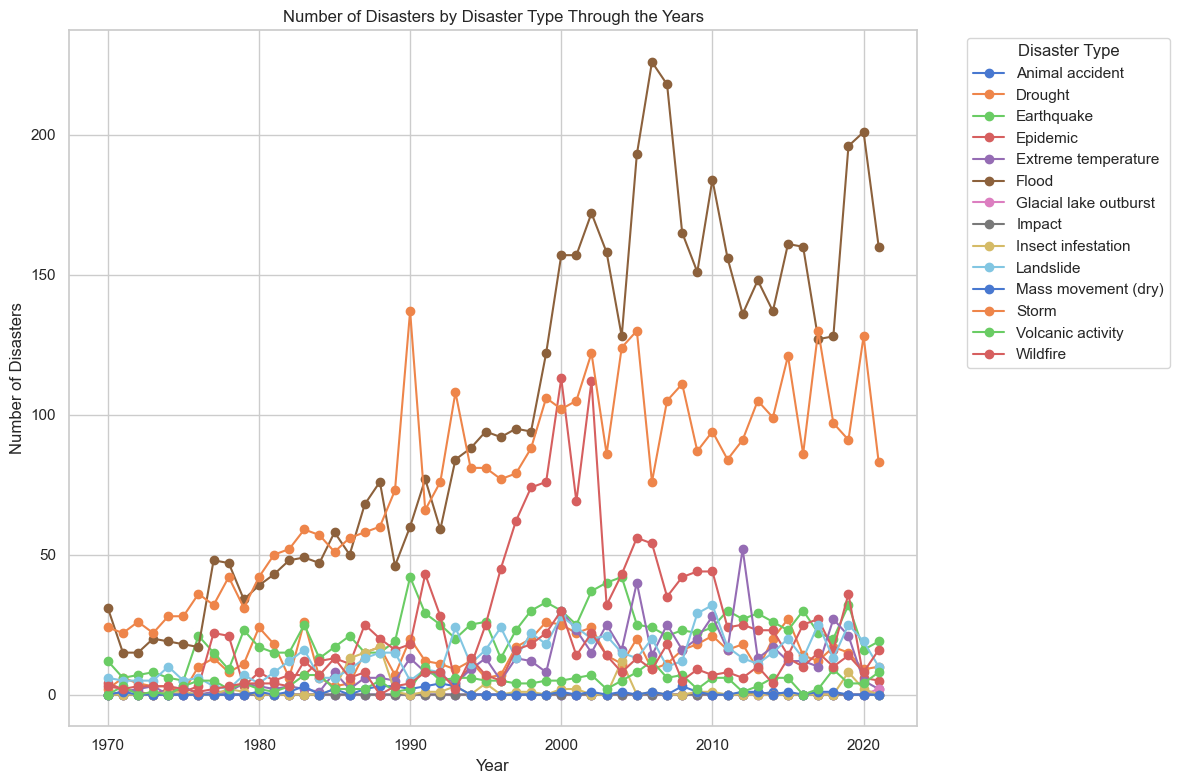

In [248]:
# Group the data by Year and Disaster Type and count the number of disasters for each combination.
year_disaster = df4.groupby(['Year', 'Disaster Type']).size().reset_index(name='count')

# Pivot table so that each disaster type becomes a column
pivot_df = year_disaster.pivot(index='Year', columns='Disaster Type', values='count').fillna(0)

# Plot data
plt.figure(figsize=(12,8))
for disaster_type in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[disaster_type], marker='o', label=disaster_type)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Number of Disasters by Disaster Type Through the Years")
plt.legend(title="Disaster Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


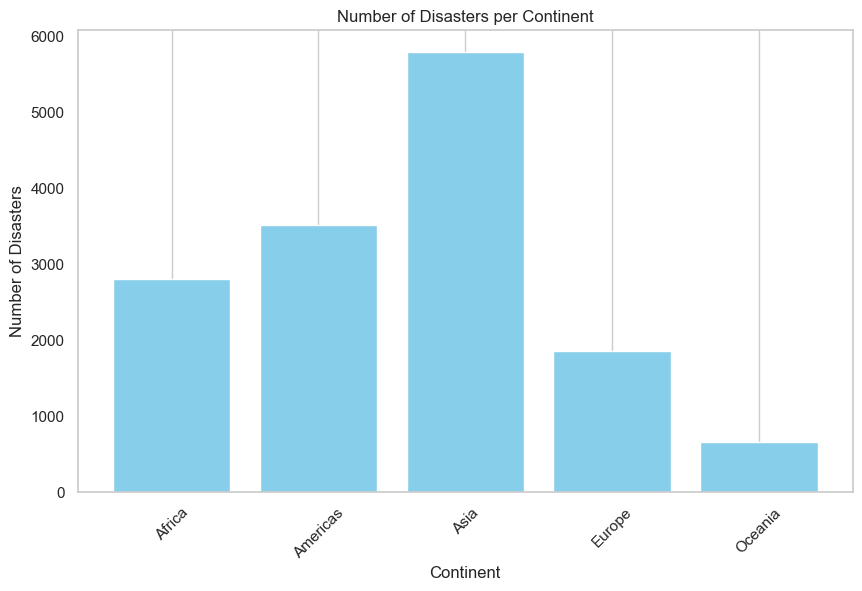

In [249]:
# Group the data by 'Continent' and count the number of disasters
disasters_per_continent = df4.groupby('Continent').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.bar(disasters_per_continent['Continent'], disasters_per_continent['count'], color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters per Continent')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


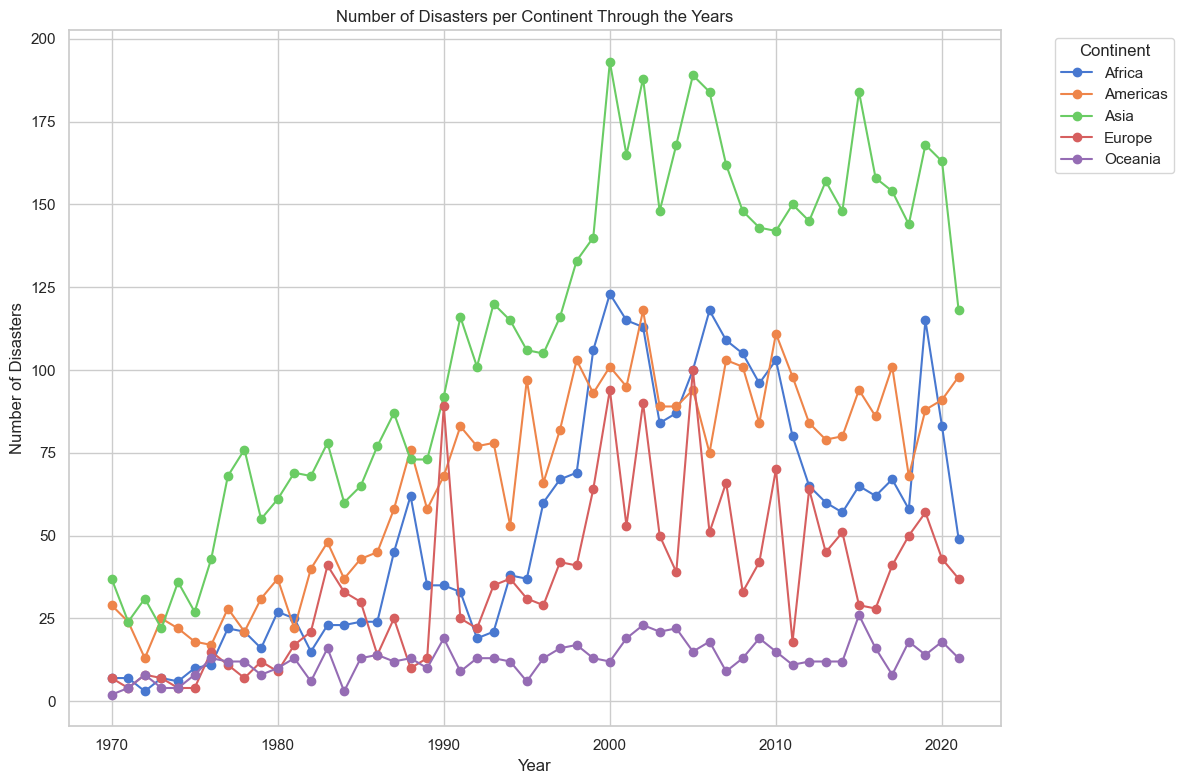

In [ ]:
#Number of Disasters per Continent Through the Years
# Group the data by Year and Continent, and count the number of disasters for each combination.
year_continent = df4.groupby(['Year', 'Continent']).size().reset_index(name='count')

# Pivot the table so that each continent becomes a column with yearly counts.
pivot_df = year_continent.pivot(index='Year', columns='Continent', values='count').fillna(0)

# Create a line chart for each continent
plt.figure(figsize=(12, 8))
for continent in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[continent], marker='o', label=continent)

plt.title("Number of Disasters per Continent Through the Years")
plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

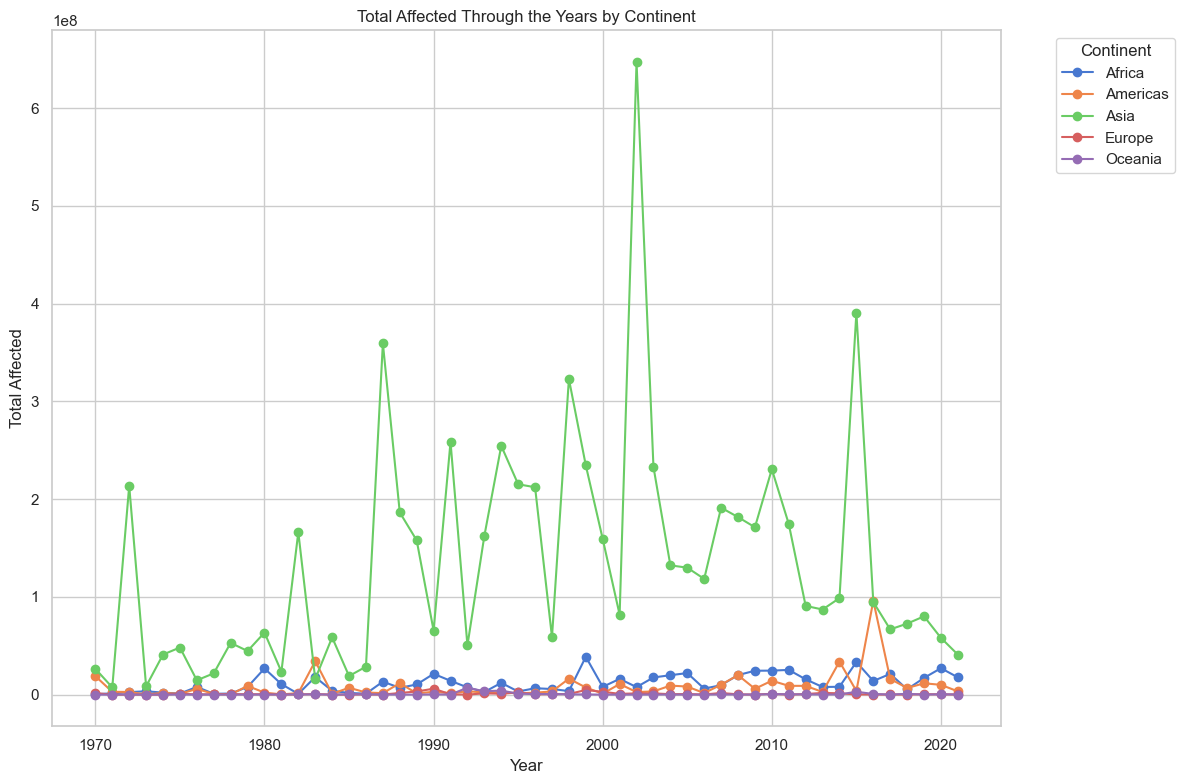

In [251]:
# Total Affected Through the Years by Continent
# Group the data by Year and Continent, summing the "Total Affected" values.
affected_by_year_continent = df4.groupby(['Year', 'Continent'])['Total Affected'].sum().reset_index()

# Pivot the table so that each continent becomes a column with the yearly sum of total affected.
pivot_affected = affected_by_year_continent.pivot(index='Year', columns='Continent', values='Total Affected').fillna(0)

# Plotting the multi-line chart for Total Affected through the years by continent.
plt.figure(figsize=(12, 8))
for continent in pivot_affected.columns:
    plt.plot(pivot_affected.index, pivot_affected[continent], marker='o', label=continent)

plt.title("Total Affected Through the Years by Continent")
plt.xlabel("Year")
plt.ylabel("Total Affected")
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


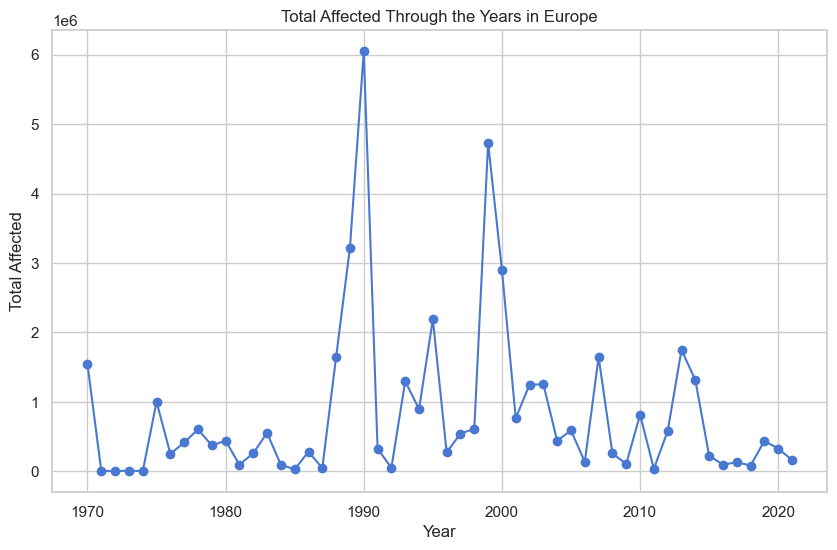

In [252]:
# Total Affected Through the Years in Europe
df_europe = df4[df4['Continent'].str.lower() == 'europe']

# Group by Year and sum up the "Total Affected" values for Europe
europe_affected = df_europe.groupby('Year')['Total Affected'].sum().reset_index()

# Plot the trend over the years for Europe
plt.figure(figsize=(10, 6))
plt.plot(europe_affected['Year'], europe_affected['Total Affected'], marker='o')
plt.title("Total Affected Through the Years in Europe")
plt.xlabel("Year")
plt.ylabel("Total Affected")
plt.grid(True)
plt.show()

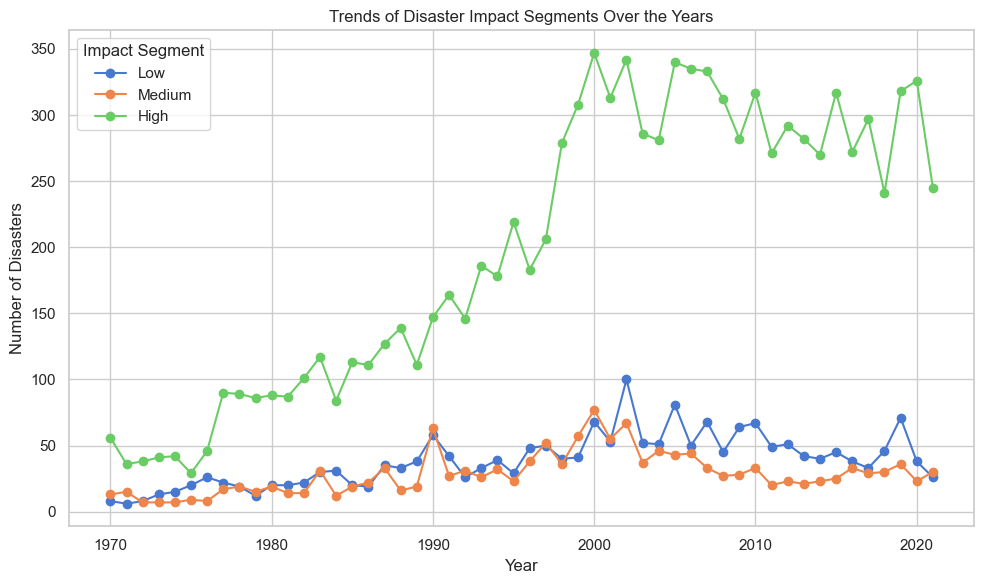

In [254]:
#Trends of Disaster Impact Segments Over the Years 
segment_year = df4.groupby(['Year', 'impact_segment'], observed=False).size().reset_index(name='count')

pivot_df = segment_year.pivot(index='Year', columns='impact_segment', values='count').fillna(0)

plt.figure(figsize=(10, 6))
for segment in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[segment], marker='o', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trends of Disaster Impact Segments Over the Years")
plt.legend(title="Impact Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


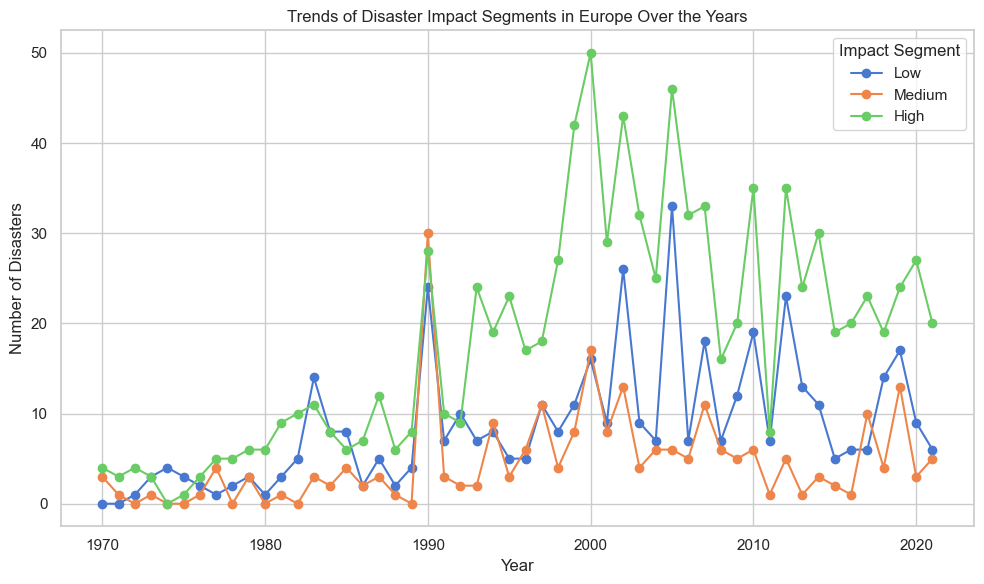

In [255]:
df_europe = df4[df4['Continent'].str.lower() == 'europe']

# Group the data by Year and impact_segment
segment_year_europe = df_europe.groupby(['Year', 'impact_segment'], observed=False).size().reset_index(name='count')

# Pivot table
pivot_df_europe = segment_year_europe.pivot(index='Year', columns='impact_segment', values='count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
for segment in pivot_df_europe.columns:
    plt.plot(pivot_df_europe.index, pivot_df_europe[segment], marker='o', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trends of Disaster Impact Segments in Europe Over the Years")
plt.legend(title="Impact Segment")
plt.grid(True)
plt.tight_layout()
plt.show()


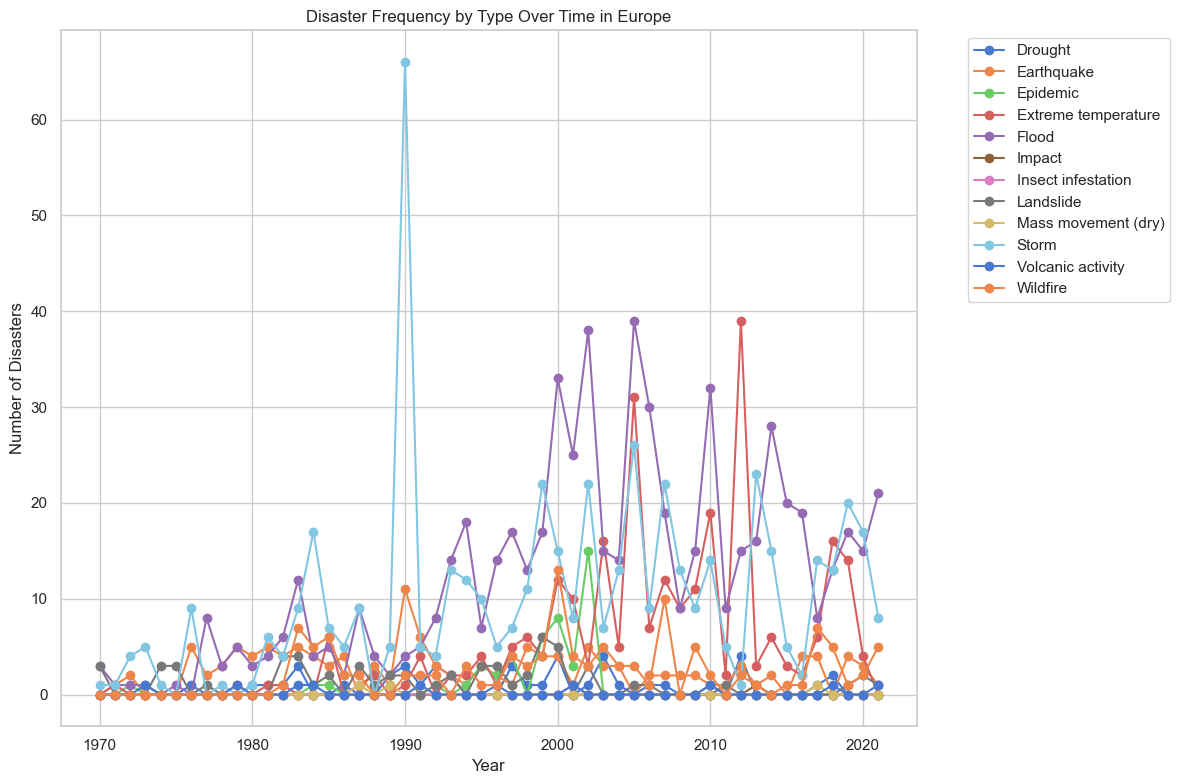

In [256]:
df_europe = df4[df4['Continent'].str.lower() == 'europe']

type_year = df_europe.groupby(['Year', 'Disaster Type'], observed=False).size().reset_index(name='count')

pivot_type_year = type_year.pivot(index='Year', columns='Disaster Type', values='count').fillna(0)

# Plot
plt.figure(figsize=(12,8))
for disaster in pivot_type_year.columns:
    plt.plot(pivot_type_year.index, pivot_type_year[disaster], marker='o', label=disaster)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Disaster Frequency by Type Over Time in Europe")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


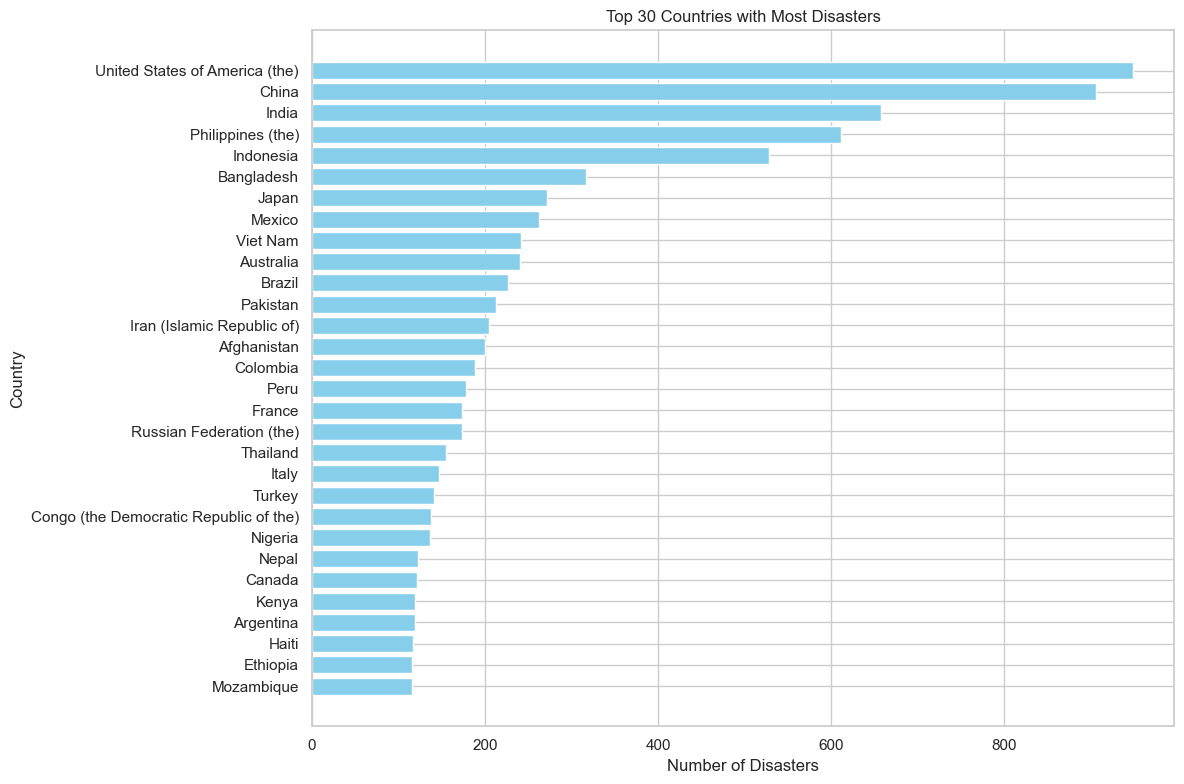

In [257]:
#Top 30 Countries with Most Disasters
disaster_counts = df4['Country'].value_counts().reset_index()
disaster_counts.columns = ['Country', 'Disaster_Count']

top_30 = disaster_counts.head(30)

# Plot 
plt.figure(figsize=(12, 8))
plt.barh(top_30['Country'][::-1], top_30['Disaster_Count'][::-1], color='skyblue')
plt.xlabel("Number of Disasters")
plt.ylabel("Country")
plt.title("Top 30 Countries with Most Disasters")
plt.tight_layout()
plt.show()


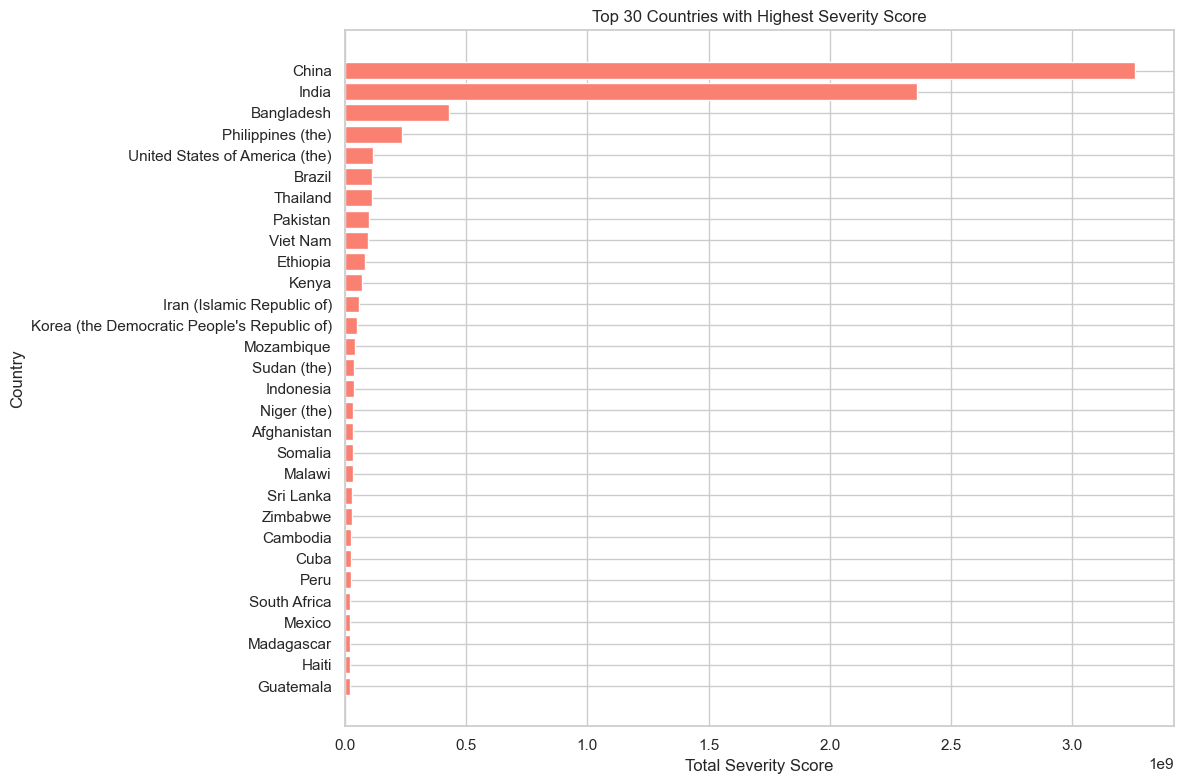

In [258]:
#Top 30 Countries with Highest Severity Score
severity_by_country = df4.groupby('Country')['severity_score'].sum().reset_index()

top_30_severity = severity_by_country.sort_values('severity_score', ascending=False).head(30)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_30_severity['Country'][::-1], top_30_severity['severity_score'][::-1], color='salmon')
plt.xlabel("Total Severity Score")
plt.ylabel("Country")
plt.title("Top 30 Countries with Highest Severity Score")
plt.tight_layout()
plt.show()


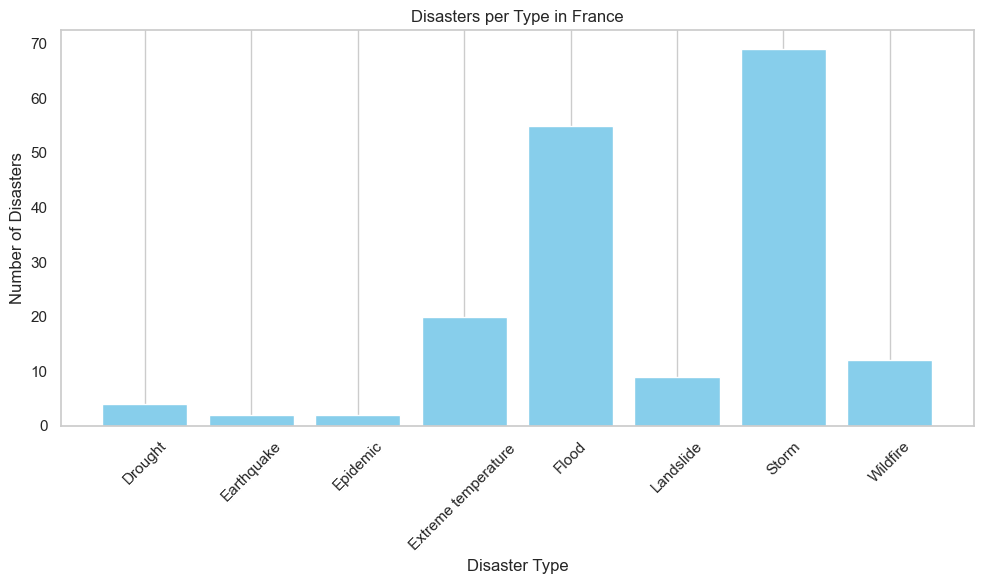

In [259]:
#Disasters per Type in France
df_france = df4[df4['Country'].str.lower() == 'france']

# Group the data by Disaster Type and count the number of disasters
disasters_per_type = df_france.groupby("Disaster Type", observed=False).size().reset_index(name='count')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(disasters_per_type["Disaster Type"], disasters_per_type["count"], color='skyblue')
plt.xlabel("Disaster Type")
plt.ylabel("Number of Disasters")
plt.title("Disasters per Type in France")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


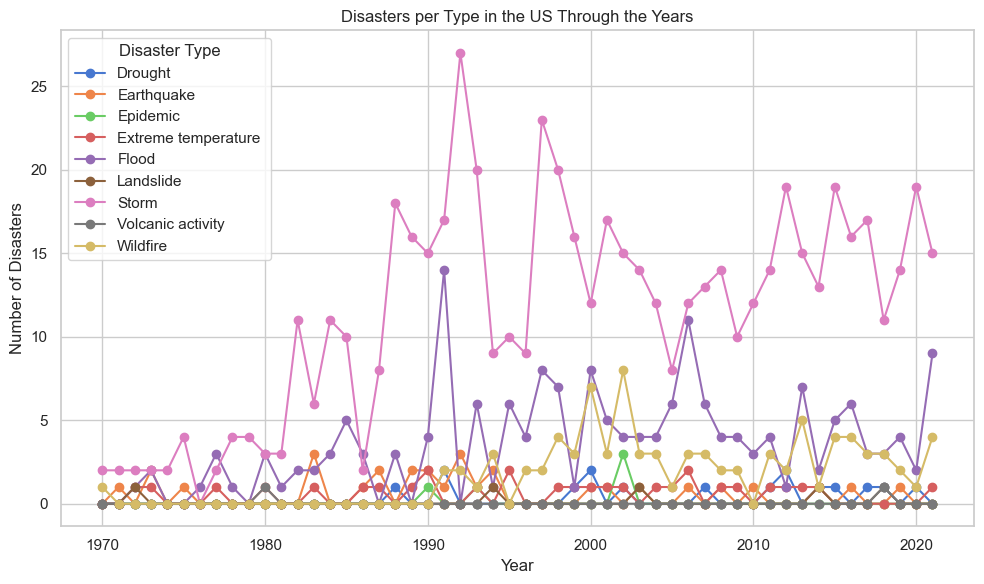

In [261]:
#Disasters per Type in the US Through the Years
us_disasters = df4[df4['ISO'] == 'USA']

disaster_type_year = us_disasters.groupby(['Year', 'Disaster Type'], observed=False).size().reset_index(name='count')

pivot_disaster = disaster_type_year.pivot(index='Year', columns='Disaster Type', values='count').fillna(0)

# Plot 
plt.figure(figsize=(10, 6))
for disaster in pivot_disaster.columns:
    plt.plot(pivot_disaster.index, pivot_disaster[disaster], marker='o', label=disaster)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Disasters per Type in the US Through the Years")
plt.legend(title="Disaster Type")
plt.grid(True)
plt.tight_layout()
plt.show()


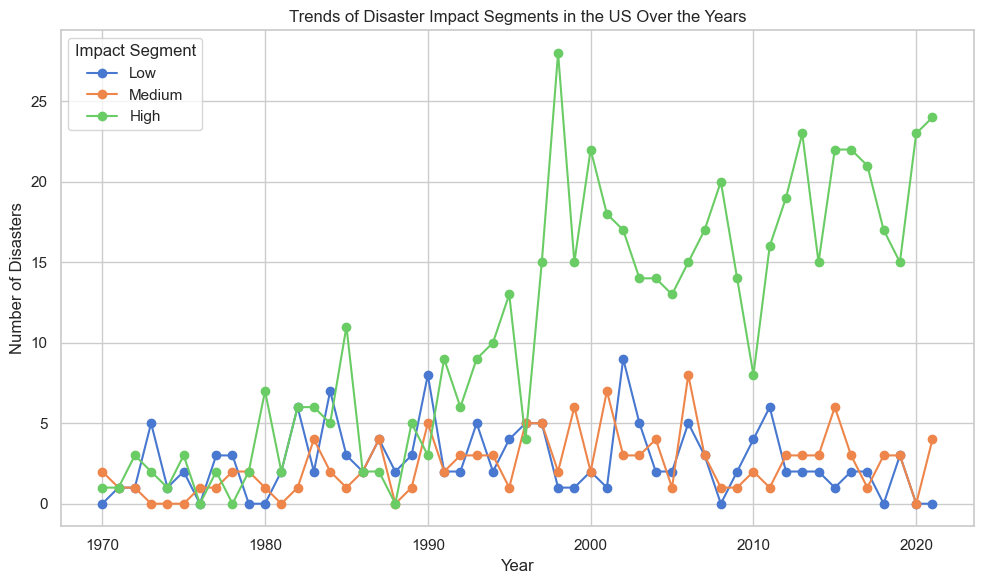

In [263]:
#Trends of Disaster Impact Segments in the US Over the Years
us_df = df4[df4['ISO'] == 'USA']

segment_year = us_df.groupby(['Year', 'impact_segment'], observed=False).size().reset_index(name='count')

pivot_df = segment_year.pivot(index='Year', columns='impact_segment', values='count').fillna(0)

# Plot
plt.figure(figsize=(10, 6))
for segment in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[segment], marker='o', label=segment)

plt.xlabel("Year")
plt.ylabel("Number of Disasters")
plt.title("Trends of Disaster Impact Segments in the US Over the Years")
plt.legend(title="Impact Segment")
plt.grid(True)
plt.tight_layout()
plt.show()
